係数（学習データ） [[ 0.71348218 -0.37272134  0.92866566 -0.42454491  1.21537768 -0.58282159
   1.58041044 -1.25357407  2.34327882]]
切片（学習データ） [-1.14927567]
決定係数（学習データ） 0.8782890883883773
決定係数（テストデータ） 0.8138634907663552


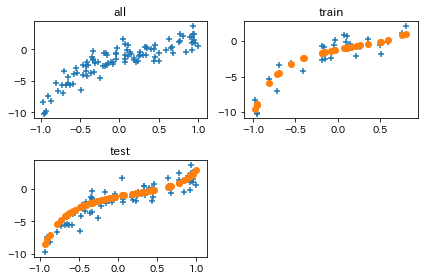

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np


### バラつきのある y = 4x^3 - 3x^2 + 2x - 1 のデータを作成

x = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x = x * 2 - 1               # 値の範囲を -2 〜 2 に変更

y = 4 * x**3 - 3 * x**2 + 2 * x - 1

y += np.random.randn(100, 1)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える

# 学習データ 30 個
x_train = x[:30]
y_train = y[:30]

# テストデータ 30 個
x_test = x[30:]
y_test = y[30:]


### Ridge で 9 次式として回帰をとってみる

from sklearn import linear_model

# 学習用の入力データ
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                x_train**4, x_train**3, x_train**2, x_train]

model = linear_model.Ridge()
model.fit(X_TRAIN, y_train)


### 係数、切片、学習データによる決定係数を表示

print('係数（学習データ）', model.coef_)
print('切片（学習データ）', model.intercept_)

print('決定係数（学習データ）', model.score(X_TRAIN, y_train))


### テストデータによる決定係数を表示

X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
               x_test**4, x_test**3, x_test**2, x_test]

print('決定係数（テストデータ）', model.score(X_TEST, y_test))


### グラフ表示

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN), marker='o')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST), marker='o')
plt.title('test')

plt.tight_layout()